# 🧩 Notebook 02: Linear Models with OLS

In [1]:
# Setup and Imports

import pandas as pd
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Project-level imports
from utils.visual_utils import (
    save_and_show_plot
)
from utils.model_utils import summarize_stats
from utils.diagnostics import compute_skewness_kurtosis

# Statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Constants and Load Data

DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/02_linear_models")
EXPORT_TABLES = Path("../exports/tables/02_linear_models")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

# Load data
df = pd.read_csv(DATA_PATH / "ols_data.csv")
df.head()

,X1,X2,y
0,5.993428,11.073362,0.847148
1,4.723471,11.682354,0.008497
2,6.295377,13.249154,2.176524
3,8.046060,13.161406,4.926576
4,4.531693,5.866992,4.015547


In [3]:
# Fit Simple Linear Model (y ~ X1)

model_simple = smf.ols('y ~ X1', data=df).fit()
print(model_simple.summary())

# Export summary table
with open(EXPORT_TABLES / "simple_model_summary.txt", "w") as f:
    f.write(model_simple.summary().as_text())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           7.96e-29
Time:                        23:24:03   Log-Likelihood:                -471.43
No. Observations:                 200   AIC:                             946.9
Df Residuals:                     198   BIC:                             953.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2593      0.514     -8.286      0.0

In [4]:
# Fit Multiple Linear Model (y ~ X1 + X2)

model_multi = smf.ols('y ~ X1 + X2', data=df).fit()
print(model_multi.summary())

# Export summary table
with open(EXPORT_TABLES / "multiple_model_summary.txt", "w") as f:
    f.write(model_multi.summary().as_text())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     456.8
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           1.05e-74
Time:                        23:24:03   Log-Likelihood:                -361.33
No. Observations:                 200   AIC:                             728.7
Df Residuals:                     197   BIC:                             738.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4961      0.451      5.530      0.0

In [5]:
# Compare R² and Adjusted R²

print("Simple Model R²:", model_simple.rsquared)
print("Multiple Model R²:", model_multi.rsquared)

print("Simple Model Adj R²:", model_simple.rsquared_adj)
print("Multiple Model Adj R²:", model_multi.rsquared_adj)

Simple Model R²: 0.46651940571954076
Multiple Model R²: 0.8226109534652932
Simple Model Adj R²: 0.4638250592837809
Multiple Model Adj R²: 0.8208100494395602


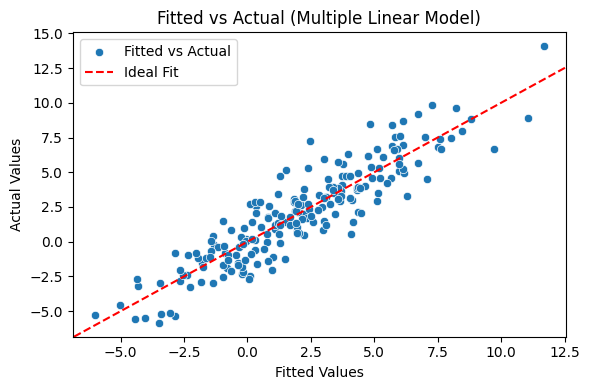

In [6]:
# Fitted vs Actual Plot

plt.figure(figsize=(6, 4))
sns.scatterplot(x=model_multi.fittedvalues, y=df['y'], label='Fitted vs Actual')
plt.xlabel("Fitted Values")
plt.ylabel("Actual Values")
plt.title("Fitted vs Actual (Multiple Linear Model)")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label="Ideal Fit")
plt.legend()
save_and_show_plot("fitted_vs_actual", EXPORT_PLOTS);

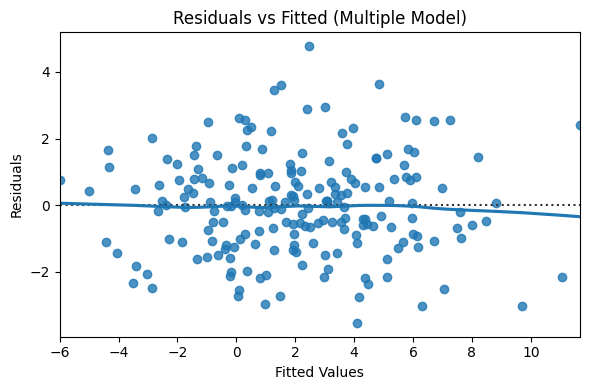

In [7]:
# Residual Plot

plt.figure(figsize=(6, 4))
sns.residplot(x=model_multi.fittedvalues, y=model_multi.resid, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Multiple Model)")
save_and_show_plot("residuals_vs_fitted", EXPORT_PLOTS);


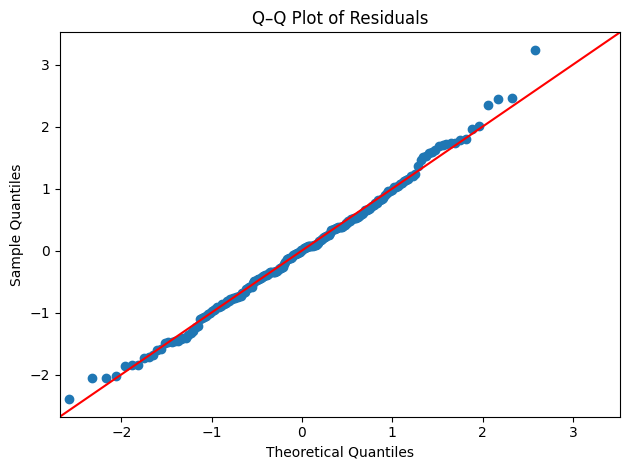

In [8]:
# Q–Q Plot for Residual Normality

fig = sm.qqplot(model_multi.resid, line='45', fit=True)
plt.title("Q–Q Plot of Residuals")
save_and_show_plot("qqplot_residuals", EXPORT_PLOTS);

## 📌 Takeaways

- Both `X1` and `X2` contribute significantly to the prediction of `y`
- R² improved in the multiple model, as expected
- Residuals appear randomly scattered with no clear pattern
- Q–Q plot shows acceptable normality in residuals, supporting inference assumptions

# ✅ Summary:
- Loaded synthetic OLS dataset `ols_data.csv`
- Fitted both simple and multiple linear regression models using `statsmodels.formula.api`
- Evaluated R², adjusted R², coefficients, and p-values
- Visualized residuals, Q–Q plot, and fitted vs actuals
- Exported model summaries and diagnostic plots